<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">Visualización de datos · PRAC1</p>
<p style="margin: 0; text-align:right;">2021-1 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudiante: Christian Alejandro Zamora Flores</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# PRAC 1: Visualización de datos 

Descripción del enunciado

Esta actividad, parte de la práctica final, consiste en la selección por parte del estudiante de un conjunto de datos de su interés que será usado en el proyecto de creación de la visualización de datos, de acuerdo con unos criterios establecidos. Básicamente, la temática es libre, pero se valorarán los siguientes aspectos:

1. La relevancia del conjunto de datos en su contexto. ¿Son datos actuales? ¿Tratan un tema importante para algún colectivo concreto? ¿Se ha tenido en cuenta la perspectiva de género? (15%)

2. La complejidad (tamaño, variables disponibles, tipos de datos, etc.). ¿Tiene cientos o miles de registros? ¿Tiene decenas de variables? ¿Combina datos categóricos y cuantitativos? Nota: Evita los conjuntos excesivamente simples. (30%)

3. La originalidad. No repitas los conjuntos de datos clásicos; puedes, sin embargo, mejorar visualizaciones existentes. ¿Hay otras visualizaciones basadas en este conjunto de datos? ¿Es una evolución o actualización de un conjunto anterior? ¿Has enriquecido un conjunto de datos ya existente? (20%)

4. Las cuestiones que responderás con la visualización de datos: ¿Tienen en cuenta los puntos anteriores? ¿Están bien planteadas? ¿Son adecuadas para el conjunto de datos elegido? (35%)

La programación y el script se lo realizará en Python con Júpiter, adicional a esto se explicarán los diferentes procesos de análisis y extracción de datos.

   
Para ello vamos a necesitar las siguientes librerías:

## 1. Selección del conjunto de datos.

Primero se verificará si el conjunto de datos cumple con los objetivos del enunciado siendo necesario comprender sus características generales. 

In [175]:
# Se importa las librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [176]:
# Función para plotear gráficas.

def group_by_plot(dataset, by, ascending=None, head=None, kind="bar", figsize=(20,5), title=None, *args, **kwargs):
    tmp = dataset.groupby(by=by).size()
    if ascending is not None:
        tmp = tmp.sort_values(ascending=ascending)
    return tmp.head(head).plot(kind = kind, figsize = figsize, title = title , *args, **kwargs)

In [177]:
# Formatea codificación del documento cuando se extrae

encoding='utf-8'
encoding = "cp1252"
encoding = "ISO-8859-1"

### Data_Exploration/WDIEXCEL.xlsx.

Este conjunto de datos contiene datos completos recopilados a partir de varios indicadores, los datos, que se remontan a 1960, han sido recopilados por el Banco Mundial de varias fuentes de renombre e incluyen diferentes ambitos como:

Agricultura y desarrollo rural,
Efectividad de la ayuda,
Cambio climático,
Economía y crecimiento,
Educación,
Energía y Minería,
Ambiente,
Deuda externa,
Sector financiero,
Género, Salud,
Infraestructura,
Protección Laboral y Social,
Pobreza,
Sector privado,
Sector público,
Tecnología científica,
Desarrollo Social,
Comercio,
Desarrollo Urbano

Debido a que el conjunto de datos se encuentra actualizado hasta el año 2020, cuenta con una gran cantidad de registros y columnas, y menciona topicos de perspectiva de género, es un referente para alcanzar los objetivos de la práctica.

In [178]:
# Extraemos la data, pero al estar en formato excel, debemos instalar la funcionalidad adicional en el paquete xlrd, para esto ejecutamos el comando conda install -c anaconda xlrd, o pip install xlrd, de esta forma se invoca a la función que extraerá la información de las hojas de cálculo.
DataDE = pd.read_excel("Data_Exploration/WDIEXCEL.xlsx",sheet_name="Data")
CountryDE = pd.read_excel("Data_Exploration/WDIEXCEL.xlsx",sheet_name="Country")
SeriesDE = pd.read_excel("Data_Exploration/WDIEXCEL.xlsx",sheet_name="Series")

In [179]:
# Verificamos la complejidad de la data estructura de la data. 
DataDE.head(5)

,Country Name,Country_Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.783289,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN
1,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,87.199474,87.512260,88.129881,87.275323,88.720097,89.308602,90.283638,89.286856,NaN,NaN
2,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,75.958878,77.251714,78.165706,75.512153,78.211000,79.065508,81.102134,79.248100,NaN,NaN
3,Arab World,ARB,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,96.466418,96.435957,96.772853,96.466705,96.936319,97.290083,97.467915,97.063959,NaN,NaN
4,Arab World,ARB,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,22.260538,NaN,NaN,30.277130,NaN,NaN,37.165211,NaN,NaN,NaN


In [180]:
# Información de la estructura del dataset (dataDE)

print("Número de columnas:", len((DataDE.columns)))
print("Número de filas:", np.shape(DataDE)[0])

Número de columnas: 65
Número de filas: 380952


Se observa que este conjunto de datos contiene gran cantidad de filas, siendo a su vez el número de columnas representativo, además la fuente es obtenida del banco mundial puede considerarse acertado utilizar esta información para la práctica.

In [181]:
# Para ver cuántos países están representados, ejecute la siguiente comando:
paises = DataDE.loc[:,'Country Name'].unique()
len(paises)

264

In [182]:
# Para ver cuántos indicadores están representados, ejecute la siguiente comando:
indicadores = DataDE.loc[:,'Indicator Code'].unique()
len(indicadores)

1443

Para mostrar los diferentes tipos de cálculo que uno podría estar interesado en realizar, consideremos un solo país, por ejemplo, Brasil. 

Supongamos que estamos interesados en la información sobre la perspectiva de género que es el tópico al que hace referencia la práctica. 

Primero, seleccionamos las filas cuya columna Pais coincida con Brasil, usando la siguiente línea de comando:

In [183]:
DataDE_br = DataDE.loc[DataDE.loc[:,'Country Name']=='Brazil',:]

En el código que precede a la línea de comando, considere la siguiente expresión:

Ahora seleccionamos todas las filas y columnas de la tabla del resultado cuando se refiere a los datos de la perspectiva de género. 

Definimos una función que, dada una cadena, determina si contiene la subcadena SG:

In [184]:
select_fcn = lambda string: string.upper().find('SG.') >= 0

Seleccionamos las filas en DataDE_br que devuelven True cuando select_fcn se aplica a la columna Código de indicador del SG.

In [185]:
criterio = DataDE_br.loc[:,'Indicator Code'].map(select_fcn)
DataDE_br_SG = DataDE_br.loc[criterio,:]

El método map() aplica una función a todos los elementos de una serie asignando el resultado a la variable criterio, para Luego utilizar la función de corte y obtener el conjunto reducido de datos. Para ver cuántas filas se seleccionaron, ejecute el siguiente comando:

In [186]:
len(DataDE_br_SG)

14

Esto significa que hay 19 indicadores relacionados con la perspectiva de género para el país llamado Brasil. 

Ahora que existe una cantidad manejable de datos, podemos mostrar una tabla que tiene
los códigos del indicador y sus significados usando la siguiente línea de comando:

In [187]:
DataDE_br_SG.loc[:,['Indicator Code', 'Indicator Name']]

,Indicator Code,Indicator Name
106484,SG.GEN.PARL.ZS,Proportion of seats held by women in national ...
106485,SG.TIM.UWRK.FE,Proportion of time spent on unpaid domestic an...
106486,SG.TIM.UWRK.MA,Proportion of time spent on unpaid domestic an...
106487,SG.VAW.1549.ZS,Proportion of women subjected to physical and/...
106505,IS.RRS.PASG.KM,"Railways, passengers carried (million passenge..."
106769,SG.LAW.INDX,Women Business and the Law Index Score (scale ...
106770,SG.DMK.SRCR.FN.ZS,Women making their own informed decisions rega...
106771,SG.DMK.ALLD.FN.ZS,Women participating in the three decisions (ow...
106772,SG.VAW.REAS.ZS,Women who believe a husband is justified in be...
106773,SG.VAW.ARGU.ZS,Women who believe a husband is justified in be...


Podemos suponer que nos interesa solo cuatro indicadores, es decir podemos continuar recortando los datos con el siguiente comando:

In [188]:
DataDE_br_SG = DataDE_br_SG.loc[[106772, 106773, 106774, 106775], :]

Esto produce una tabla manejable de 4 filas y 58 columnas. Obteniendo en cada fila 
una serie de tiempo de los datos correspondientes sobre la perspectiva de género a partir del año 1960.

La tabla esta presentada de forma transpuesta es decir las series de tiempo están en las filas de la tabla, en su lugar de estar abajo de las columnas. Entonces, todavía tenemos que trabajar un poco más con nuestra tabla.

Queremos que los índices de nuestra tabla sean los años. También queremos tener una columna para cada indicador económico y desea utilizar los nombres de los indicadores económicos (no los códigos) como las etiquetas de las columnas. Así es como se puede hacer esto:

In [189]:
idx = DataDE_br_SG.loc[:,'1960':].columns
cols = DataDE_br_SG.loc[:,'Indicator Name']
data = DataDE_br_SG.loc[:,'1960':]#.as_matrix()
#br_data = pd.DataFrame(data.transpose(), columns=cols, index=idx)
#pdata = br_data.ix['1970':, 0] 
#pdata.plot(color='DarkRed', lw=2, title='Brazil GDP, billions of current US$')

## Descripción del conjunto de datos.

En Cualquier conjunto de datos real, existe mucha información asociada con los datos intrínsecos. Estos suelen llamarse metadatos y describen información sobre el conjunto de datos principal, incluidos elementos como las etiquetas que se utilizan para las filas y/o columnas, brindando un detalle de la recopilación de datos y explicaciones sobre el significado de los datos. 

La hoja Country en el archivo es WDIEXCEL.xlsx, contiene información sobre el significado de las etiquetas de datos para las diversas series de tiempo contenidas en los datos.

Los datos reales están en la hoja Data de WDIEXCEL.csv. Como este archivo contiene ainformación de metadatos, podremos hacer todo el trabajo utilizando solo este archivo.

Es posible elegir una de las columnas del archivo de datos como índice pasando el parámetro index_col al método read_excel(), specificando su posición o etiqueta en el archivo. 

Se requiere algo de trabajo para poner en un formato adecuador para usarlo para la visualizar datos. Las filas del archivo contienen una serie temporal de datos anuales sobre un indicador económico. 

El archivo de data esta descargado en formato xlsx:

### WDIEXCEL.xlsx

Las hojas dentro del archivo se describen a continuación:

#### Data

    Country Name: Nombre del país.
    Country Code: Código del país. Sirve para establecer una relación con otro conjunt de datos.
    Indicator Name: Nombre del indicador.
    Indicator Code: Código de indicador. Puede servir para establecer relacion con otro conjunto de datos.
    Identificación para los años desde 1960 a 2016: una columna CADA UNO para el valor de la variable en cada año que estuvo disponible.

#### Country

    Código de país
    Nombre corto
    Nombre de la tabla
    Nombre largo
    2-alphacode
    Unidad monetaria
    Notas especiales
    Región
    Grupo de ingresos
    Código WB-2.
    Año base de cuentas nacionales
    Año.de.referencia.de.cuenta.nacional
    SNA.price.valuation
    Lending.category
    Otros.grupos
    Sistema.de.cuentas.Nacionales
    Factor.conversión.alternativa
    PPP.survey.year
    Balance.de.pagos.Manual.en.uso.
    External.debt.Reporting.status
    Sistema.de.comercio
    Concepto.de.contabilidad.de.gobierno
    Norma.de.difusión.de.datos.del.MIF
    Latest.population.census
    Última.encuesta.de.hogares.
    Fuente.de.los.datos.de.ingreso.y.gasto.más.recientes
    Vital.registration.complete
    Último.censo.agrícola
    Latest.industrial.data
    Latest.trade.data
    Últimos.datos.de.extracción.de.agua.

#### FootNote

    Código de país
    SeriesCode
    Año
    DESCRIPCIÓN

### Series-Time

    SeriesCode
    Año
    DESCRIPCIÓN

#### Series

    Serie.Código
    Tema
    Indicator.Name
    Definición corta
    Definición larga
    Unidad de medida
    Periodicidad
    Base.Period
    Otras notas
    Método de agregación
    Limitaciones y excepciones
    Notes.from.original.source
    Comentarios generales
    Fuente
    Concepto.y.metodología.estadística
    Relevancia.desarrollo
    Vínculos.fuentes.relacionados
    Otros.vínculos.web
    Indicadores.relacionados

## Análisis del conjunto de datos.

A nivel mundial la proporción de sexos en los seres humanos es de aproximadamente 1: 1 por lo que una hipótesis errónea podría ser que habría el mismo número de hombres y mujeres en todos los países del mundo.

Pero no es el caso. Existen muchas razones por las que el equilibrio general de género de un país difiere del 50/50 de otro. Algunas de estas hipotesis son:

#### Diferencias en la migración: 

Algunos países atraen o importan un gran número de trabajadores extranjeros para trabajos con desequilibrio de género, como la construcción o el cuidado de niños.

#### Diferencias en las tasas de mortalidad: 

Estos pueden incluir:

Mayores tasas de mortalidad masculina (por ejemplo, en países que han experimentado períodos prolongados de guerra (y donde es más probable que los hombres sean combatientes)).

Mayores tasas de mortalidad femenina (por ejemplo, en países con altas tasas de muerte durante el parto, o donde los sistemas legales y sociales conducen a un aumento del infanticidio femenino)

#### Discriminación de género

Existe la hipótesis de que la discriminación de género obstaculiza el crecimiento económico.

La relación negativa entre la discriminación basada en el género y el ingreso per cápita es alta, esto sugiere que el costo económico de la discriminación por motivos de género ocasiona pérdida de ingresos. 

Ahora que tenemos una idea de los fenómenos sociales que podríamos estar viendo, comenzamos a revisar los datos:

In [190]:
# Tipos de datos datos del dataset
DataDE.dtypes

Country Name       object
Country_Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2016              float64
2017              float64
2018              float64
2019              float64
2020              float64
Length: 65, dtype: object

Consulta de valores nulos en las columnas del dataset.

In [191]:
l1 = []
for col in DataDE.columns:
    sum1 = DataDE[col].isnull().values.sum()
    if sum1 > 0:
        l1.append(col)
        # Comprobamos valores nulos
        print('%s valores nulos en la columna' % DataDE[col].isnull().values.sum(), col )

print(l1)
print(len(l1))

343582 valores nulos en la columna 1960
338708 valores nulos en la columna 1961
336480 valores nulos en la columna 1962
336629 valores nulos en la columna 1963
336084 valores nulos en la columna 1964
333895 valores nulos en la columna 1965
333811 valores nulos en la columna 1966
332110 valores nulos en la columna 1967
332538 valores nulos en la columna 1968
330702 valores nulos en la columna 1969
312680 valores nulos en la columna 1970
305748 valores nulos en la columna 1971
302690 valores nulos en la columna 1972
303166 valores nulos en la columna 1973
301711 valores nulos en la columna 1974
298027 valores nulos en la columna 1975
295723 valores nulos en la columna 1976
291853 valores nulos en la columna 1977
292220 valores nulos en la columna 1978
291386 valores nulos en la columna 1979
286627 valores nulos en la columna 1980
284390 valores nulos en la columna 1981
282761 valores nulos en la columna 1982
283185 valores nulos en la columna 1983
282435 valores nulos en la columna 1984


Consulta de los tipos de columnas existentes (numéricas, clasificatorias, texto) 

In [192]:
tipo_text_cat = ['Country Name','Country_Code', 'Indicator Name', 'Indicator Code']
tipo_num_cat = []
tipo_texto = ['Country Name','Country_Code', 'Indicator Name', 'Indicator Code']
tipo_num = [ 
'1960','1961','1962','1963','1964','1965','1966','1967','1968','1969','1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020'
]


all_type = []
all_type.extend( tipo_text_cat )
all_type.extend( tipo_num_cat )
all_type.extend( tipo_texto )
all_type.extend( tipo_num )
print( all_type )

for name in DataDE.columns:
    if name not in all_type:
        tipo_num_cat.append( DataDE )

print('Categorías Texto'    , len( tipo_text_cat ))
print('Categorías Numéricas', len( tipo_num_cat ))
print('Campos tipo Texto'   , len( tipo_texto   ))
print('Campos tipo Número'  , len( tipo_num     ))

['Country Name', 'Country_Code', 'Indicator Name', 'Indicator Code', 'Country Name', 'Country_Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
Categorías Texto 4
Categorías Numéricas 0
Campos tipo Texto 4
Campos tipo Número 61


El resumen indica que existen 4 columnas con datos categóricos de tipo texto y 61 campos con valores numéricos.

Existen también atributos categóricos, los cuales clasifican los acuerdos según características generales. Se describen a continuación:

### Country Name: Países/poblaciones donde se ha efectuado el estudio.

### Region: 

Región del mundo a la que pertenece cada pais siendo las sisguientes regiones:

	Africa 
	Americas
	Asia and Pacific
	Europe and Eurasia
	Middle East and North Africa
	Cross-regional
	Other

### Indicator Name: Nombre del indicador poblacional.

	2005 PPP conversion factor, GDP (LCU per international $)
    2005 PPP conversion factor, private consumption (LCU per international $)
    Access to electricity (% of population)
	Other: Otros indicadores

### Topic: Tema del indicador

	Agricultura y produccion 
	Land use
	Economia
	Otros
### Años desde 1960 a 2020

	Valor que indica el año que se sucitó el indicador.

In [193]:
# Identifica los valores de las categorias de tipo textual.

for name in tipo_text_cat:
    values = DataDE[name].unique()
    print(name, len(values), values)

Country Name 264 ['Arab World' 'Caribbean small states' 'Central Europe and the Baltics'
 'Early-demographic dividend' 'East Asia & Pacific'
 'East Asia & Pacific (excluding high income)'
 'East Asia & Pacific (IDA & IBRD countries)' 'Euro area'
 'Europe & Central Asia' 'Europe & Central Asia (excluding high income)'
 'Europe & Central Asia (IDA & IBRD countries)' 'European Union'
 'Fragile and conflict affected situations'
 'Heavily indebted poor countries (HIPC)' 'High income' 'IBRD only'
 'IDA & IBRD total' 'IDA blend' 'IDA only' 'IDA total'
 'Late-demographic dividend' 'Latin America & Caribbean'
 'Latin America & Caribbean (excluding high income)'
 'Latin America & the Caribbean (IDA & IBRD countries)'
 'Least developed countries: UN classification' 'Low & middle income'
 'Low income' 'Lower middle income' 'Middle East & North Africa'
 'Middle East & North Africa (excluding high income)'
 'Middle East & North Africa (IDA & IBRD countries)' 'Middle income'
 'North America' 'Not cla

Comenzaremos a analizar indicadores de género para algunos paises. Tomamos com ejemplo Zimbabwe, primero extraemos la información referente para este pais.

In [194]:
# Zimbabwer (indicador de género 2019)
ZWE = DataDE[(DataDE["Country Name"]=='Zimbabwe')].reset_index(drop=True)
ZWE.head(2)

,Country Name,Country_Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Zimbabwe,ZWE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,30.27,30.02,29.880000,29.63,29.36,29.050000,NaN,NaN,NaN,NaN
1,Zimbabwe,ZWE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,36.90,44.00,38.338825,32.30,33.70,39.923992,40.482048,41.041584,NaN,NaN


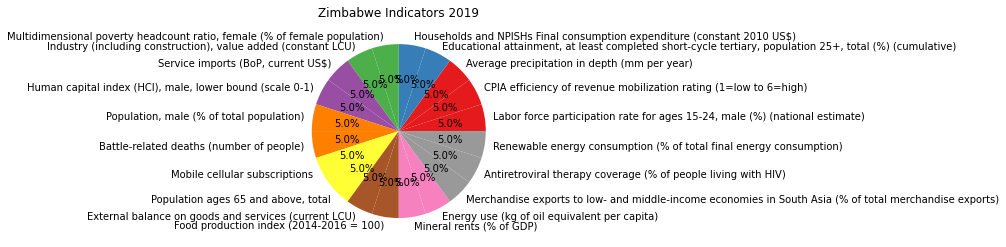

In [195]:
# Graficamos el resultado
color = plt.cm.Set1(np.linspace(0,1,20))
ZWE["Indicator Name"].value_counts().sort_values(ascending=False).head(20).plot.pie(y="2019",colors=color,autopct="%0.1f%%")
plt.title("Zimbabwe Indicators 2019")
plt.axis("off")
plt.show()

Extraemos los paises Arabes

In [196]:
ARB = DataDE[(DataDE["Country Name"]=='Arab World')].reset_index(drop=True)
ARB.head(1)

,Country Name,Country_Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.783289,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN


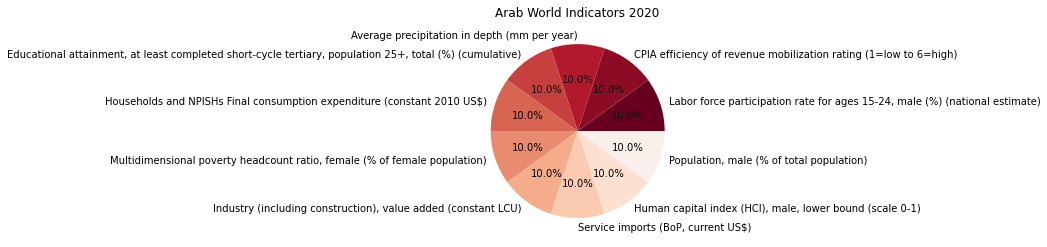

In [197]:
# Graficmos datos referentes a los indicadores de género.
color = plt.cm.RdBu(np.linspace(0,1,20))
ARB["Indicator Name"].value_counts().sort_values(ascending=False).head(10).plot.pie(y="2020",colors=color,autopct="%0.1f%%")
plt.title("Arab World Indicators 2020")
plt.axis("off")
plt.show()

Ahora vemos los indicadores para Brazil

In [198]:
BRA = DataDE[(DataDE['Country Name']=='Brazil')].reset_index(drop=True)
BRA.head(1)

,Country Name,Country_Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Brazil,BRA,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,94.07,94.48,94.77,95.1,95.38,95.59,NaN,NaN,NaN,NaN


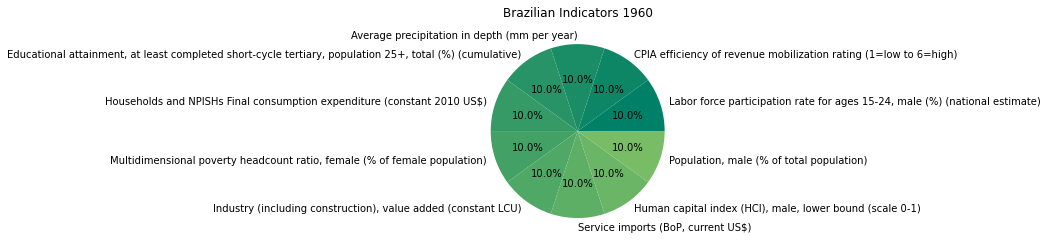

In [199]:
# Visualizamos indicadores para el año 1960
color = plt.cm.summer(np.linspace(0,1,20))
ARB["Indicator Name"].value_counts().sort_values(ascending=False).head(10).plot.pie(y="1960",colors=color,autopct="%0.1f%%")
plt.title("Brazilian Indicators 1960")
plt.axis("off")
plt.show()

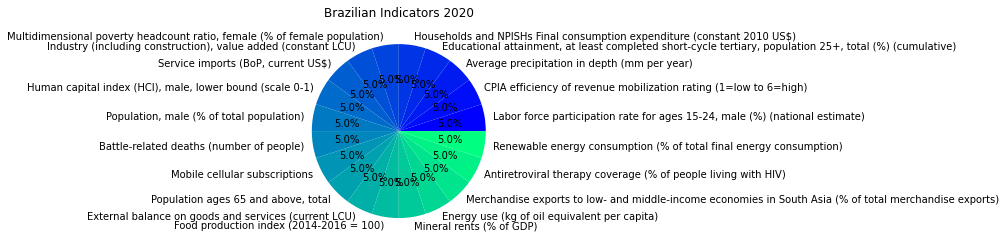

In [200]:
# Ahora visualizamos indicadores para el año 2020
color = plt.cm.winter(np.linspace(0,1,20))
ARB["Indicator Name"].value_counts().sort_values(ascending=False).head(20).plot.pie(y="2020",colors=color,autopct="%0.1f%%")
plt.title("Brazilian Indicators 2020")
plt.axis("off")
plt.show()

<AxesSubplot:xlabel='2020', ylabel='Indicator Name'>

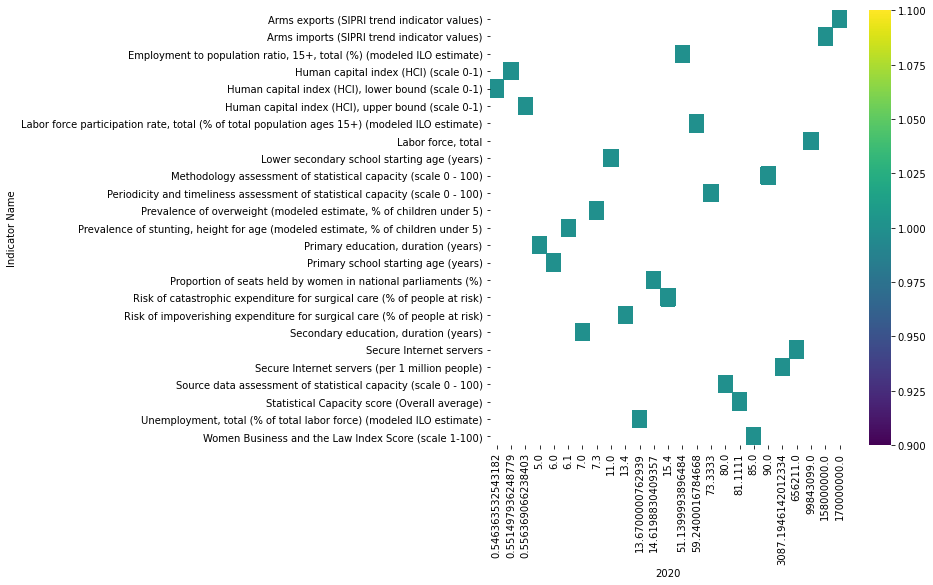

In [201]:
# Ahora creamos una gráfica la cual describe la relacion entre los porcentajes y cantidades establecidas en el año 2020 para el indicador respectivo representado en el eje de las Y. El tipo de gráfica es "viridis", algo parecido a un mapa de calor
fig,ax = plt.subplots(1,1, figsize=(8,8))
degree = BRA.groupby(['Indicator Name', '2020']).size().unstack()#.fillna(0)
degree = degree.div(degree.sum(axis=1), axis=0)
sns.heatmap(degree, cmap='viridis')

In [202]:
SeriesDE = pd.read_excel("Data_Exploration/WDIEXCEL.xlsx",sheet_name="Series")
DataDE_mg = pd.merge(DataDE, CountryDE[['pkCountry_Code','Region']], left_on="Country_Code", right_on="pkCountry_Code")
DataDE_mg = pd.merge(DataDE_mg, SeriesDE[['Series Code','Topic']], left_on="Indicator Code", right_on="Series Code")

In [203]:
DataDE_mg.head(5)

,Country Name,Country_Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,pkCountry_Code,Region,Series Code,Topic
0,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,84.171599,84.510171,NaN,NaN,NaN,NaN,ARB,NaN,EG.CFT.ACCS.ZS,Environment: Energy production & use
1,Caribbean small states,CSS,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,91.001057,91.496541,NaN,NaN,NaN,NaN,CSS,NaN,EG.CFT.ACCS.ZS,Environment: Energy production & use
2,Central Europe and the Baltics,CEB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,95.335099,95.485364,NaN,NaN,NaN,NaN,CEB,NaN,EG.CFT.ACCS.ZS,Environment: Energy production & use
3,Early-demographic dividend,EAR,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,49.343238,50.277523,NaN,NaN,NaN,NaN,EAR,NaN,EG.CFT.ACCS.ZS,Environment: Energy production & use
4,East Asia & Pacific,EAS,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,60.442655,61.259518,NaN,NaN,NaN,NaN,EAS,NaN,EG.CFT.ACCS.ZS,Environment: Energy production & use


In [204]:
DataDEdrop = DataDE_mg.drop(['Country_Code','Indicator Code','Region','pkCountry_Code','Series Code' ],axis=1)
DataDEdrop.head(5)

,Country Name,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Topic
0,Arab World,Access to clean fuels and technologies for coo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN,Environment: Energy production & use
1,Caribbean small states,Access to clean fuels and technologies for coo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,89.235672,89.858980,90.477017,91.001057,91.496541,NaN,NaN,NaN,NaN,Environment: Energy production & use
2,Central Europe and the Baltics,Access to clean fuels and technologies for coo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,94.664957,94.884779,95.138227,95.335099,95.485364,NaN,NaN,NaN,NaN,Environment: Energy production & use
3,Early-demographic dividend,Access to clean fuels and technologies for coo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46.395595,47.493546,48.469161,49.343238,50.277523,NaN,NaN,NaN,NaN,Environment: Energy production & use
4,East Asia & Pacific,Access to clean fuels and technologies for coo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,57.617948,58.690647,59.542970,60.442655,61.259518,NaN,NaN,NaN,NaN,Environment: Energy production & use


In [205]:
DataDE_filter = DataDEdrop.loc[DataDE_mg['Topic'].str.contains("Gender", case=False)]
print(DataDE_filter.shape)

(3945, 64)


In [206]:
g = DataDE_filter.groupby('Indicator Name')
g.groups.keys()

dict_keys(['Proportion of seats held by women in national parliaments (%)', 'Proportion of time spent on unpaid domestic and care work, female (% of 24 hour day)', 'Proportion of time spent on unpaid domestic and care work, male (% of 24 hour day)', 'Proportion of women subjected to physical and/or sexual violence in the last 12 months (% of women age 15-49)', 'Women Business and the Law Index Score (scale 1-100)', 'Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care  (% of women age 15-49)', 'Women participating in the three decisions (own health care, major household purchases, and visiting family) (% of women age 15-49)', 'Women who believe a husband is justified in beating his wife (any of five reasons) (%)', 'Women who believe a husband is justified in beating his wife when she argues with him (%)', 'Women who believe a husband is justified in beating his wife when she burns the food (%)', 'Women who believe a husban

In [207]:
g = DataDE_filter.groupby('Topic')
g.groups.keys()

dict_keys(['Gender: Agency', 'Gender: Health', 'Gender: Participation & access', 'Gender: Public life & decision making'])

In [208]:
DataDE_Agency = DataDE_filter.loc[DataDE_mg['Topic'].str.contains("Gender: Agency", case=False)]
DataDE_Health = DataDE_filter.loc[DataDE_mg['Topic'].str.contains("Gender: Health", case=False)]
DataDE_Participation = DataDE_filter.loc[DataDE_mg['Topic'].str.contains("Gender: Participation & access", case=False)]
DataDE_LifePublic = DataDE_filter.loc[DataDE_mg['Topic'].str.contains("Gender: Public life & decision making", case=False)]

In [209]:
DataDE_Agency.dropna(how='all', axis=1, inplace=True)
DataDE_Health.dropna(how='all', axis=1, inplace=True)
DataDE_Participation.dropna(how='all', axis=1, inplace=True)
DataDE_LifePublic.dropna(how='all', axis=1, inplace=True)

<ipython-input-209-af9f1b7a12d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataDE_Agency.dropna(how='all', axis=1, inplace=True)
<ipython-input-209-af9f1b7a12d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataDE_Health.dropna(how='all', axis=1, inplace=True)
<ipython-input-209-af9f1b7a12d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataDE_Participation.dropna(how='all', axis=1, inplace=True)
<ipython-input-209-af9f1

Exporta el nuevo dataframe para realizar la respectiva visualizacion de datos

In [210]:
DataDE_Agency.to_excel("DataAgency.xlsx", sheet_name='Agency' , index=False)
DataDE_Health.to_excel("DataHealth.xlsx", sheet_name='Health' , index=False)
DataDE_Participation.to_excel("DataParticipation.xlsx", sheet_name='Participation' , index=False)
DataDE_LifePublic.to_excel("DataLifePublic.xlsx", sheet_name='LifePublic' , index=False)